# ITCS 4156 - Programming Assignment 2 - Classification

<font color="blue"> Austin E Baker </font>

# Imports

In [1]:
import random
import inspect
from typing import Tuple, List, Union
from pdb import set_trace

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

%matplotlib inline  
%load_ext autoreload
%autoreload 2

In [2]:
# setting random seed for reproducible results
np.random.seed(25)
random.seed(25)

## Instructions

In this programming assignment you will be training **three** different kinds of classification models to classify handwritten digits given in the famous [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset. The three models you'll be using are:

1. Rosenblatt's perceptron for binary classification using only the digits 0 and 1.
2. Naive Bayes for multi-class classification of ALL digits 0-9.
3. Logistic regression for multi-class classification of ALL digits 0-9

This mini-projects will work similarly to the labs where there are TODOs you must complete. Be on the lookout for **TODO** tags - they guide you towards what needs to be done. However, unlike the labs, most of the coding will now be left to you and there will be less direct instructions. The goal of this mini-project is for you to practice what your learned in the labs on your own! There are two types of TODOs:

1. **TODO**: This is a TODO that will be manually graded by the TA.
2. **AutoLab TODO**: This is a TODO that will be automatically graded using Autolab.

Below are the steps you'll need to take to complete this mini project.


### Step 1: Reviewing data, visualizations, and utility functions.
The first step is loading the MNIST data, going through the visualizations, and reviewing the data cleaning and transformations that need to be done. Furthermore, take time to review the utility functions, plots, and metrics functions so you know how to use them (most of these functions we have seen in prior labs).


### Step 2: Writing algorithms, setting hyper-parameters, and defining data cleaning/transformations

#### Defining Algorithm
Next, you will implement each of the three models. You will write your code in the files found in the `itcs4156/assigments/classification` directory for `Perceptron.py`, `NaiveBayes.py`, and `LogisticRegression.py`.

To test your implementations, you will perform the training and validation within this notebook. Additionally, you will provide visualization of your results.

By default, this entire notebook will run and produce a score of around ~32 points. If you are struggling submitting working code (no errors are thrown during `run_eval()`) will at least give you some baseline points towards the mini-project.

#### Defining hyper-parameters and data clean/transformations

Additionally, you will need to add code for setting hyper-parameters and data cleaning/transformations in the  `itcs4156/assigments/classification/train.py` file. Within the `train.py` is the class `HyperParametersAndTransforms`. Within the `HyperParametersAndTransforms` class are sub-classes that correspond to each algorithm: `Perceptron`, `NaiveBayes`, and `LogisticRegression`. These sub-classes are where you will set your hyper-parameters and data clean/transformations for EACH algorithm. 

Within each one of these sub-class you need to set the hyper-parameter variables which are marked by the `# TODO` comments. Hyper-parameters that are required will be marked with the following tag: `# (REQUIRED) TODO`. If the TODO comment is marked as `# (OPTIONAL) TODO`, setting the hyper-parameter is optional and can be left alone.

Furthermore, you will need to create a Sklearn `Pipeline` class instance which will preform data cleaning/preprocessing. You will do so by storing a `Pipeline` class instance in the `self.feature_pipe` variable which will hold all the preprocessing steps for feature cleaning. Additionally, you will store a `Pipeline` class instance in the `self.target_pipe` variable which will hold the preprocessing steps for the labels/targets (think about how we did preprocessing in the labs). Note, some algorithm might NOT require both/either feature or target cleaning. Thus, the `(REQUIRED)` `(OPTIONAL)` tags in the TODO comments will act as a hint, indicating if feature or target cleaning is required to achieve good performance. If you think an algorithm does not need both/either feature or target preprocessing then leave `self.feature_pipe = None` or `self.target_pipe = None`. 

As each algorithm will require different preprocessing. Most, if not all, the basic preprocessing classes that we have used throughout the labs are available to you in the `itcs4156/util/data.py` file. Refer to the labs for how to define Sklearn's `Pipeline` class instance and pass the required preprocessing classes such as `AddBias`, `Standardization`, `ImageNormalization`, and `OneHotEncoding`. If you want to define your own preprocessing classes then do so in the `itcs4156/assigments/classification/train.py` file.

### Step 3: Local score estimation

Before submitting to Autolab, you will need to run the evaluation code using the `run_eval()` function located at the bottom of the notebook. This is a local test that uses the validation data to estimate the score you might receive on Autolab when using the actual testing data. Since you have a limited number of Autolab submissions be sure to perform well on these local tests before submitting. 



### Step 4: Submit to Autolab

If you are satisfied with the local performance of your models, then you can now submit to Autolab. To do so zip the `classification/` directory inside `itcs4156/assigments/` directory and then submit the zip file to Autolab. 

Once submitted, you must wait for Autolab to grade your code. Depending on the amount of submissions and optimization of your code this can take up to 10 minutes. If your code exceeds the 10 minute wall, Autolab will stop grading your assignment and report a 0. If this happens, you will need to figure out why your algorithm is taking too long to run and resubmit. Once again, use the local testing using `run_eval()` to debug your code! 

Below is a visualization of which folder to zip and submit to Autolab.

```
| - itcs4156
    | - assignments
        | - classification   <----------- Zip folder and submit to Autolab
            | - train.py
            | - Perceptron.py
            | - NaiveBayes.py
            | - LogisticRegression.py
            | - evaluate.py
            | - __init__.py
    | - notebooks
        | - 2 - Classification.ipynb 
```



### Step 5: Submit to Canvas

Finally, you'll need to submit this notebook to Canvas. 

Below is a visualization of which notebook to submit to Canvas.
```
| - itcs4156
    | - assignments
        | - classification  
            | - train.py
            | - Perceptron.py
            | - NaiveBayes.py
            | - LogisticRegression.py
            | - evaluate.py
            | - __init__.py
    | - notebooks
        | - 2 - Classification.ipynb <----- Upload this file on Canvas
```


## Additional Notes

- You are free to create your own class variables in `__init__()` method. If you want to pass class variables as hyper-parameters, instead of hard coding them, then also define them in the corresponding sub-class within the `HyperParametersAndTransforms` class.

- You are free to define your own classes, methods, or functions within each class or file EXCEPT in the `evaluate.py` script.

- For analysis, you can use any library you want in the notebook. However, matplolib and seaborn will be unavailable in the evaluation environment so refrain from importing them with the python files.

- Even though scikit-learn is available during evaluation, you should be implementing your own algorithms instead of using the library. This will be reviewed before the final grading. Please feel free to import other python modules contained within the `requirements.txt` file found in the root of the Gitlab repository. These include libraries such as NumPy and Pandas. However, keep in mind the above constraints on importing plotting libraries. 

- **Epochs (number of iterations of data)**: While training your models locally, you can keep this number as high as you want. But please keep in mind, that for evaluation your job will have a maximum of **10 minutes** to finish training and prediction for all the three algorithms. So tune this parameter, keeping this information in mind. 

## Grading 


The final grading will be done using the **TEST** dataset split that you have not seen before. The test set will be used when you submit to **Autolab**. 80 points will come from whether or not you pass accuracy checks. This time around, you can received partial points depending on the accuracy score received for each algorithm

**You are allowed a maximum of <u>5</u> submissions to Autolab for this lab. <u>Only your final submission will be graded</u>**. Further, when you submit to Autolab, you will only have **10 minutes for <u>ALL</u> your algorithms to be trained and tested**.

Points | TODO Type | Description
--|----|----:
20 | In notebook TODOs | Visualize and anlyze results 
25 | Autolab TODO 1 | Perceptron 
25 | Autolab TODO 2 | Naive Bayes
30 | Autolab TODO 3 | Logistic Regression

The rank will be computed based on your total points earned and the total execution time for all 3 models/tasks. Your ranking will be visible to you (and anonymous to others) in leader board on Autolab as you make submissions.

Below is the breakdown of the scores/points that you can receive for each algorithm. 

### Scoring system for perceptron based on accuracy

You can receive a maximum of 25 points for the Perceptron algorithm. Below is the function used to compute your score. Feel free to run the function with a given accuracy to see what score you would receive for this algorithm.

The `acc` argument is the accuracy you receive and the `max_score` argument is the maximum number of points you can receive (this varies per algorithm). The `score_percent` is determined by your `acc` score. The final score is computed by the following equation: `max_score * score_percent / 100.0`.

For example, if `acc = .71` then your `score_percent=80` and your score for the perceptron algorithm would be 20 points.

In [3]:
from itcs4156.assignments.classification.evaluate import rubric_perceptron
print(inspect.getsource(rubric_perceptron))

def rubric_perceptron(acc, max_score=25):
    score_percent = 0
    if acc >= 0.8:
        score_percent = 100
    elif acc >= 0.75:
        score_percent = 90
    elif acc >= 0.70:
        score_percent = 80
    elif acc >= 0.65:
        score_percent = 70
    elif acc >= 0.60:
        score_percent = 60
    elif acc >= 0.55:
        score_percent = 50
    else:
        score_percent = 40
    score = max_score * score_percent / 100.0 
    return score



In [4]:
acc = 0.54
rubric_perceptron(acc)

10.0

### Scoring system for Naive Bayes based using accuracy
You can receive a maximum of 25 points for the Naive Bayes algorithm. Below is the function used to compute your score. Feel free to run the function with a given accuracy to see what score you would receive for this algorithm.

In [5]:
from itcs4156.assignments.classification.evaluate import rubric_naive_bayes
print(inspect.getsource(rubric_naive_bayes))

def rubric_naive_bayes(acc, max_score=25):
    score_percent = 0
    if acc >= 0.70:
        score_percent = 100
    elif acc >= 0.60:
        score_percent = 90
    elif acc >= 0.50:
        score_percent = 80
    elif acc >= 0.40:
        score_percent = 70
    elif acc >= 0.30:
        score_percent = 60
    elif acc >= 0.20:
        score_percent = 50
    elif acc >= 0.10:
        score_percent = 45
    else:
        score_percent = 40
    score = max_score * score_percent / 100.0 
    return score



In [6]:
acc = 0.10
rubric_naive_bayes(acc)

11.25

### Scoring scheme for Logistic Regression using accuracy

You can receive a maximum of 30 points for the logistic regression algorithm. Below is the function used to compute your score. Feel free to run the function with a given accuracy to see what score you would receive for this algorithm.

In [7]:
from itcs4156.assignments.classification.evaluate import rubric_logistic_regression
print(inspect.getsource(rubric_logistic_regression))

def rubric_logistic_regression(acc, max_score=30):
    score_percent = 0
    if acc >= 0.80:
        score_percent = 100
    elif acc >= 0.70:
        score_percent = 90
    elif acc >= 0.60:
        score_percent = 80
    elif acc >= 0.50:
        score_percent = 70
    elif acc >= 0.40:
        score_percent = 60
    elif acc >= 0.30:
        score_percent = 55
    elif acc >= 0.20:
        score_percent = 50
    elif acc >= 0.15:
        score_percent = 45
    else:
        score_percent = 40
    score = max_score * score_percent / 100.0 
    return score



In [8]:
acc = 0.15
rubric_logistic_regression(acc)

13.5

# Data Loading: MNIST Dataset

<img src="https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067" width=300 height=300>


The dataset you'll be using for this project is the famous [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset which contains images of handwritten digits 0 through 9. There are 60,000 images included in the dataset and each image is a gray scale image of size 28x28. Each pixel represents a feature which means there are $28*28$ or $784$ features per each data sample.

**The goal of the dataset is to classify each image of handwritten digits correctly!**

The dataset consists of 3 splits:

1. **Train**: Throughout this assignment you will be training your model using this data. There are approximately 44k training samples.
2. **Validation**: You will then use this set to tune your model and evaluate its performance. There are approximately 12k training samples.
3. **Test**: This split simulates real life data which we often don't have access to until the model is deployed. We have kept this split hidden from you and we will use it to judge the performance of your model on Autolab.

We will download the training and validation splits shortly. The test split will remain hidden from you and Autolab will use it compute your final grade. 

Even though this dataset is public, you will have a different version of training and validation splits that are curated for this assignment. The training and validation splits are downloaded automatically and the testing split is kept secret for evaluation done on Autolab.

First, let's download the training and validation dataset to your machine. To do so, we'll need the `MNISTDataset` class from our module which is located at `itcs4156.datasets.MNISTDataset` or in the `itcs4156/datasets/MNISTDataset.py` file.

In [9]:
from itcs4156.datasets.MNISTDataset import MNISTDataset

If you don't want to open the code via a text editor or IDE, we can use Python's `inspect` module to display the source code for us. Take a look at the `MNISTDataset` source code. Then method you want to pay attention to is the `load()` method which will load the data either as a Pandas DataFrame or NumPy array.

In [10]:
import inspect
print(inspect.getsource(MNISTDataset))

class MNISTDataset(Dataset):

    def __init__(self): 
        
        self.data_dir = os.path.join(os.path.dirname(os.path.abspath(__file__)), "data", "MNIST")

        self.data = {
           
            "urls" : {
                "trn" : "https://drive.google.com/uc?export=download&id=1PepMZ-2uHWf0HO-PG9we03jJ46BRHNUJ",
                "vld"  : "https://drive.google.com/uc?export=download&id=1ER4qAUWncgZLSfGL_-hKmMqhFbUaImYt"
            },

            "paths" : {
                "X_trn" : os.path.join(self.data_dir, 'train_images.csv'),
                "y_trn" : os.path.join(self.data_dir, 'train_labels.csv'),
                "X_vld" : os.path.join(self.data_dir, 'val_images.csv'),
                "y_vld" : os.path.join(self.data_dir, 'val_labels.csv')
            }
        }

        self.init_download()

    def init_download(self):
        if not os.path.exists(self.data_dir):
            os.makedirs(self.data_dir)
        for key, url in self.data["urls"].items():
         

Next, let's load the data by instantiating the `MNISTDataset` class. If you already have the data downloaded then the download will be skipped.

In [11]:
dataset = MNISTDataset()

Skipping download. File already exists: c:\users\himea\desktop\itcs4156\mini-projects\itcs4156\datasets\data\MNIST\trn.zip

Unzipping: c:\users\himea\desktop\itcs4156\mini-projects\itcs4156\datasets\data\MNIST\trn.zip

Skipping download. File already exists: c:\users\himea\desktop\itcs4156\mini-projects\itcs4156\datasets\data\MNIST\vld.zip

Unzipping: c:\users\himea\desktop\itcs4156\mini-projects\itcs4156\datasets\data\MNIST\vld.zip



Below we load the data. Notice, the data is loaded as DataFrames! When we pass our data to the algorithms, we will convert them to NumPy arrays. However, when we pass our data to the data cleaning/transformation pipelines, we will pass DataFrames (just like in the labs).

In [12]:
# This can take a few seconds as the MNIST dataset is rather large!
X_trn_df, y_trn_df, X_vld_df, y_vld_df = dataset.load()
print(f"X_trn_df type: {type(X_trn_df)}")
print(f"y_trn_df type: {type(y_trn_df)}")
print(f"X_vld_df type: {type(X_vld_df)}")
print(f"y_vld_df type: {type(y_vld_df)}")

Loading dataset with Pandas...
Done!
X_trn_df type: <class 'pandas.core.frame.DataFrame'>
y_trn_df type: <class 'pandas.core.frame.DataFrame'>
X_vld_df type: <class 'pandas.core.frame.DataFrame'>
y_vld_df type: <class 'pandas.core.frame.DataFrame'>


Below are print statements to help you understand how the data is setup. Since we are working with images the data comes as a 2D array instead a 3D array of shape (data samples, width, height). This means our data will have the shape (data samples, features) where the number of features are equal to the width multiplied by the height (i.e., the number of pixels)!

Pay attention to the number of data samples, features, and classes the training and validation splits have. Also, pay attention to the number of data samples per class. Notice they are relatively equal!

In [13]:
print(f"Shape of training data X_trn_df: {X_trn_df.shape}")
print(f"Shape of training labels y_trn_df: {y_trn_df.shape}")

print(f"Shape of validation data X_vld_df: {X_vld_df.shape}")
print(f"Shape of validation labels y_vld_df: {y_vld_df.shape}")

class_labels, trn_class_counts = np.unique(y_trn_df['class'], return_counts=True)
_, vld_class_counts = np.unique(y_vld_df['class'], return_counts=True)
print(f"\nUnique class labels:\n\t{class_labels}")
print(f"Training labels unique class label counts:\n\t{trn_class_counts}")
print(f"Validation labels unique class label counts:\n\t{vld_class_counts}")

Shape of training data X_trn_df: (44800, 784)
Shape of training labels y_trn_df: (44800, 1)
Shape of validation data X_vld_df: (11200, 784)
Shape of validation labels y_vld_df: (11200, 1)

Unique class labels:
	[0 1 2 3 4 5 6 7 8 9]
Training labels unique class label counts:
	[4434 5003 4504 4564 4425 4001 4384 4641 4378 4466]
Validation labels unique class label counts:
	[1126 1274 1106 1144 1104 1039 1096 1149 1090 1072]


# Data Visualization and Exploration

Let's start off by visualizing what a single data sample from the MNIST dataset looks like. We do so using the `get_first_sample()` function which gets the first data sample from the passed DataFrame `X_trn_df`. 

Notice that the data sample has 784 features. Recall the the image dimensions are 28x28 which means we need to reshape the 784 features/pixels back into the shape 28x28 in order to properly visualize the data sample.

Below, we use a fancy Pandas DataFrame to visualize the first data sample which is a zero. When printing out the `first_sample_df` DataFrame you can see the pixel values are between 0 and 255. Since the images are given in gray scale, higher pixel values move towards absolute black and lower pixel values move towards absolute white. Here 0 corresponds to absolute black and 255 is absolute white. 

In [14]:
def get_first_sample(X_df):
    first_sample = X_df.iloc[0].values
    print(f"first_sample type: {type(first_sample)}")
    print("Shape of first sample BEFORE reshape:", first_sample.shape)
    first_sample = first_sample.reshape(28, 28)
    print("Shape of first sample AFTER reshape:", first_sample.shape)
    first_sample_df = pd.DataFrame(first_sample)
    
    return first_sample_df

first_sample_df = get_first_sample(X_trn_df)
first_sample_df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

first_sample type: <class 'numpy.ndarray'>
Shape of first sample BEFORE reshape: (784,)
Shape of first sample AFTER reshape: (28, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,4,54,141,191,129,29,7,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,26,179,252,252,252,253,252,187,94,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,29,210,253,252,99,56,69,187,252,228,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,26,210,252,241,65,6,0,0,7,203,252,151,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,16,166,253,241,51,0,0,0,0,0,135,253,226,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,128,252,252,115,0,0,0,0,0,0,66,246,244,56,0,0,0,0,0,0


Next, we display some random samples from each of the 9 classes using the `display_classes()` function. Remember, MNIST contains handwritten digits for the digits 0 through 9.

In [15]:
import math

def display_classes(
    images: np.ndarray, 
    labels:np.ndarray,
    shape: tuple=(28,28),
    n_samples=5):
    """ Displays random samples from MNIST classes 
        
        Args:
            images: A NumPy array where each row is a data sample and
                each column corresponds to a pixel location.
                
            labels: A NumPy array where each row corresponds to an
                image label.
                
            shape: 2D Shape of the images. By default each data sample in images 
                should be a flattened array.
                
            n_samples: Number of samples to display 
                
    """
    # Get the unique class labels
    class_labels = np.unique(labels)
    # Compute the total number of images to plot
    plot_n_images = len(class_labels) * n_samples
    
    n_cols = n_samples
    # Compute the number of rows and round up
    n_rows = math.ceil(plot_n_images / n_cols)
    # Define subplot 
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*4))
    # Plot images
    for i, label in enumerate(class_labels):
        # Find all class locations
        all_class_locs = np.where(labels==label)[0]
        # Randomly choose class data samples
        selected_class_locs = np.random.choice(all_class_locs, n_samples, replace=False)
        # Plot label/name per row
        axs[i, 0].set_ylabel(f"Class: {label}", size='large')
        
        for j, cls_loc in enumerate(selected_class_locs):
            # Reshape image into width x height
            img = images[cls_loc].reshape(shape)
            # Plot image
            axs[i,j].imshow(img, cmap=plt.cm.gray)
            # Disable x and y ticks
            axs[i,j].set_xticks([])
            axs[i,j].set_yticks([])

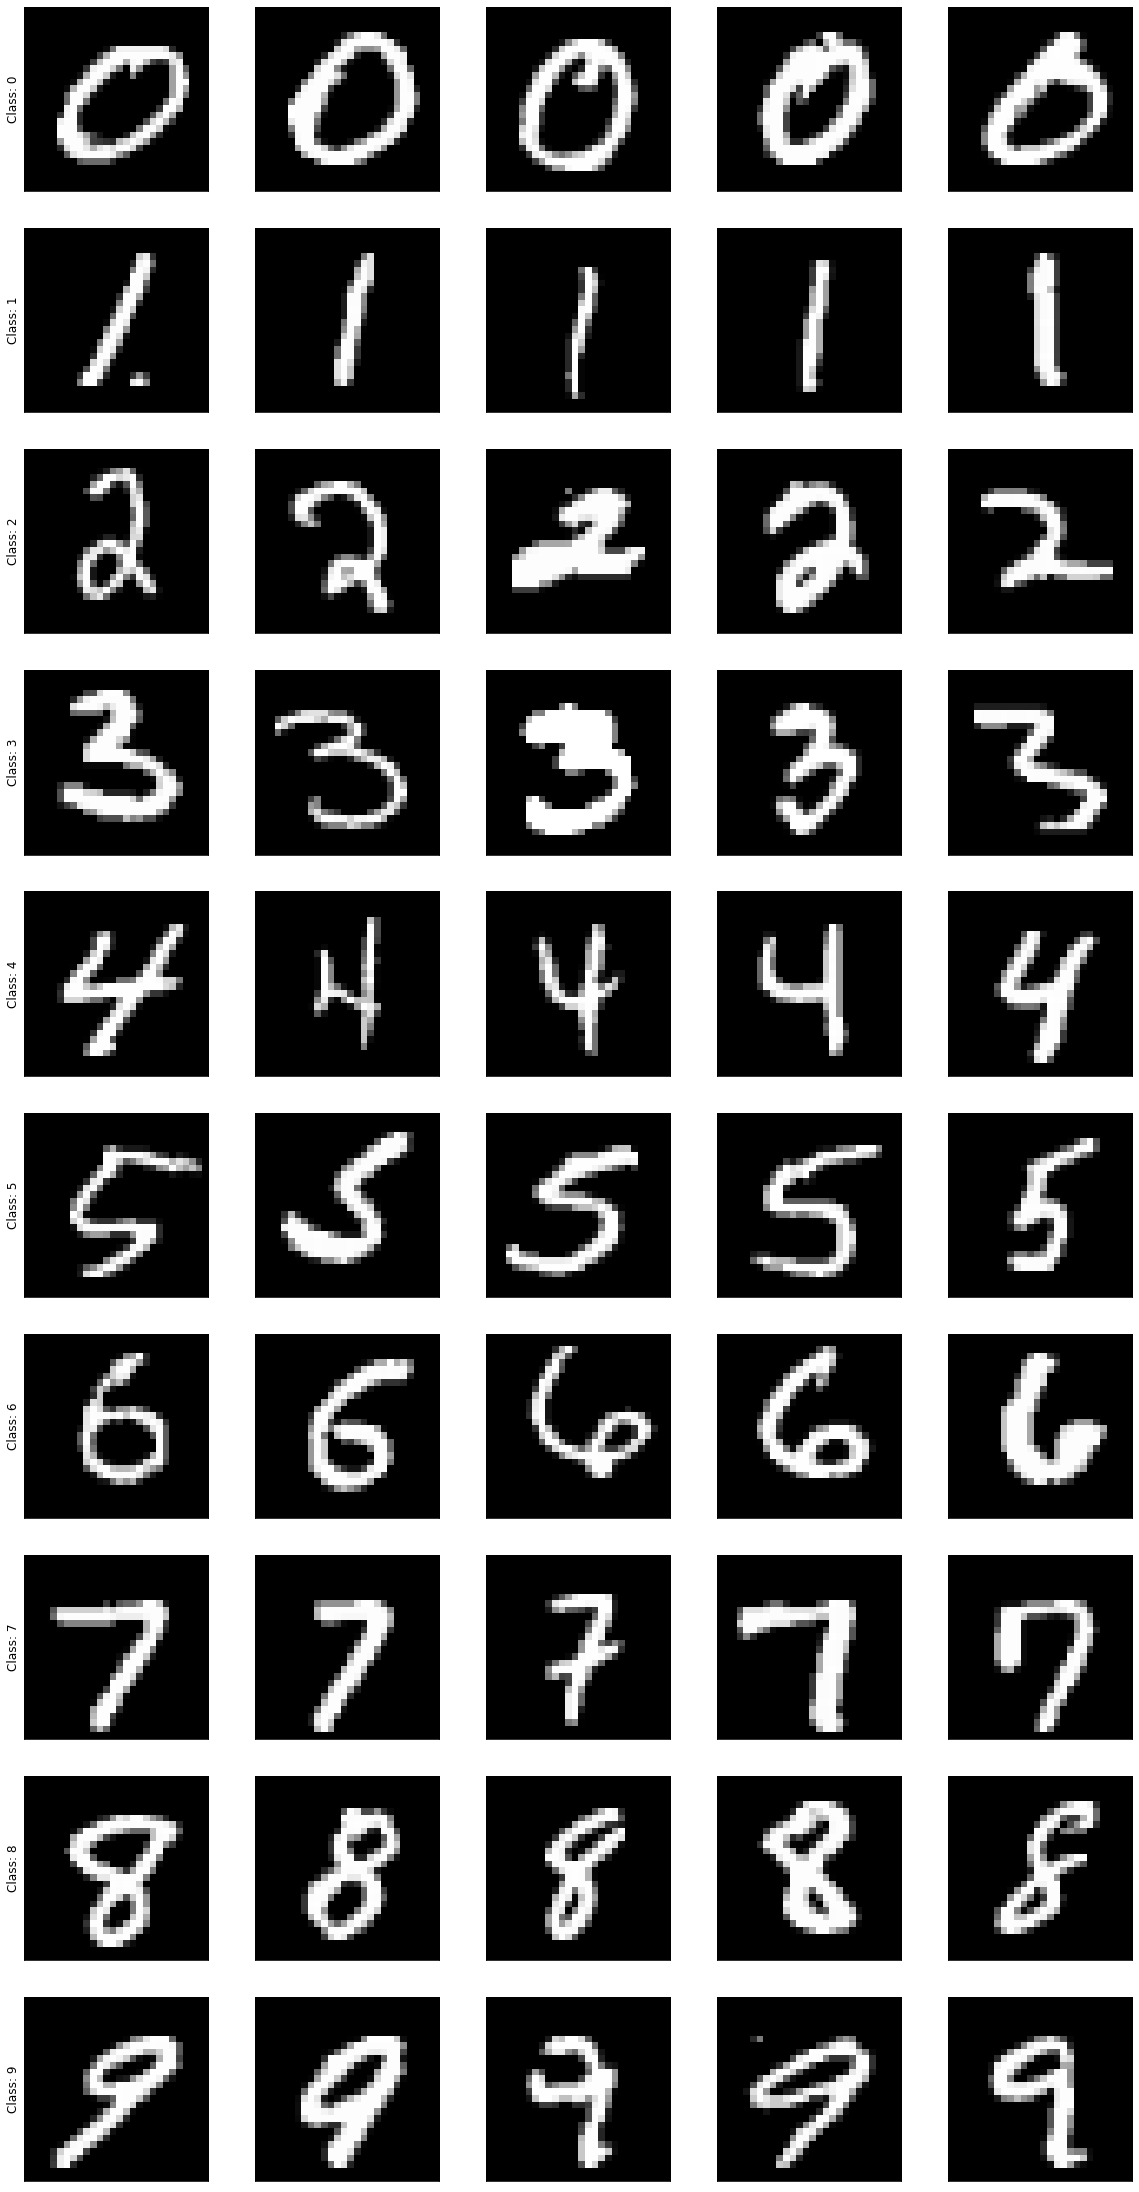

In [16]:
# This can take a few seconds to run
display_classes(X_trn_df.values, y_trn_df.values, shape=(28,28))

# Data Cleaning and Transformations Review

Below we review the data cleaning and transformation class you'll need to use to to preprocess the data within the `itcs4156/assigments/classification/HyperParametersAndTransforms.py` file.

## Standardizing

Recall the `Standardization` class used in the labs. We redefine this same class for you which is one way to standardize your features (i.e., pixels) of the MNIST data. 

In [17]:
from itcs4156.util.data import Standardization
print(inspect.getsource(Standardization))

class Standardization(BaseEstimator, TransformerMixin):
    def __init__(self, epsilon=1e-6):
        self.epsilon = epsilon
    
    def fit(self, X: Union[np.ndarray, pd.DataFrame], y: pd.DataFrame = None):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        return self
    
    def transform(self, X):
        return (X  - self.mean) / (self.std + self.epsilon)



## Normalizing

A new type of normalization that is specific for images is given by the `ImageNormalization` class. All this class does is divide each feature (i.e., pixel) by 255. Recall the pixel values are between 0 and to 255. Doing so makes sure all values are between 0 and 1.

Sometimes performing this form of normalization on images is better than standardization and sometimes it isn't. You'll have to try both and see which works best!

In [18]:
from itcs4156.util.data import ImageNormalization
print(inspect.getsource(ImageNormalization))

class ImageNormalization(BaseEstimator, TransformerMixin): 
    def fit(self,
            X: pd.DataFrame, 
            y: pd.DataFrame = None) -> pd.DataFrame:
        return self
    
    def transform(self,
                  X: pd.DataFrame, 
                  y: pd.DataFrame = None) -> pd.DataFrame:
        return (X/255).astype(np.float16)



Below is an example of what imagine normalization does when dividing by 255.

In [19]:
mnist_norm = ImageNormalization()
first_sample = get_first_sample(X_trn_df)
norm_first_samples = mnist_norm.fit_transform(first_sample)
norm_first_samples.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

first_sample type: <class 'numpy.ndarray'>
Shape of first sample BEFORE reshape: (784,)
Shape of first sample AFTER reshape: (28, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015686,0.211792,0.552734,0.749023,0.505859,0.113708,0.027451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101990,0.702148,0.988281,0.988281,0.988281,0.992188,0.988281,0.733398,0.368652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.113708,0.823730,0.992188,0.988281,0.388184,0.219604,0.270508,0.733398,0.988281,0.894043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101990,0.823730,0.988281,0.945312,0.254883,0.023529,0.000000,0.000000,0.027451,0.795898,0.988281,0.592285,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062744,0.650879,0.992188,0.945312,0.199951,0.000000,0.000000,0.000000,0.000000,0.000000,0.529297,0.992188,0.886230,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.501953,0.988281,0.988281,0.450928,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.258789,0.964844,0.957031,0.219604,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Adding bias

The last data preprocessing class is the `AddBias`. This is the same class used in the labs and can be used to add a columns of 1s to your data. Remember, only some of certain algorithms require a bias to be added.

In [20]:
from itcs4156.util.data import AddBias
print(inspect.getsource(AddBias))

class AddBias(BaseEstimator, TransformerMixin):
    def fit(self,
            X: pd.DataFrame, 
            y: pd.DataFrame = None) -> pd.DataFrame:
        return self
    
    def transform(self,
                  X: pd.DataFrame, 
                  y: pd.DataFrame = None) -> pd.DataFrame:
        X = X.copy()
        X.insert(0, 'bias', 1)
        return X



## One-hot

The final data preprocessing class is the `OneHotEncoding`. This is the same class used in the labs and can be used to convert categorical features and labels into one-hot encodings.

In [21]:
from itcs4156.util.data import OneHotEncoding
print(inspect.getsource(OneHotEncoding))

class OneHotEncoding(BaseEstimator, TransformerMixin):
    def __init__(self, categories='auto'):
        self.feature_names = None
        self.categories = categories
        self.encoder = OneHotEncoder(categories=categories, sparse=False)

    def fit(self,
            X: pd.DataFrame, 
            y: pd.DataFrame = None):
        self.encoder.fit(X)
        self.feature_names = self._get_dataframe_names(X)
        return self
        
    def _get_dataframe_names(self, X: pd.DataFrame) -> np.ndarray:
        df_names = []
        sk_names = self.encoder.get_feature_names()
        
        # Sklearn returns column names but they are missing the
        # leading month_ and day_ that pd.get_dummies would
        # give us. So this loop fixes that!
        for i, column_name in enumerate(X.columns):
            for sk_name in sk_names:
                replace = f'x{i}'
                if sk_name.startswith(replace):
                    df_name = sk_name.replace(replace, column_name)

# Setting Hyperparameters and Declaring Transformations 

Recall, step 2 requires, for each algorithm you set hyper-parameters and define a Sklearn `Pipeline` class instance with data cleaning/transformations defined for your features and labels/targets (see step 2 for more details).

Below is the `HyperParametersAndTransforms` class contained within `itcs4156/assignments/classification/train.py` script. Recall `HyperParametersAndTransforms` class contains sub-class for the  `Perceptron`, `NaiveBayes`, and `LogisticRegression` algorithms. Within each of these sub-classes are TODO comments marked by `# TODO `. These TODO comments indicate where you need to set the hyper-parameters and where you need to set the feature/target Sklearn `Pipelines`.

Furthermore, each sub-class contains four methods defined as follows:
- `fit()` Fits the `self.feature_pipe` and `self.target_pipe` if they are defined.

- `transform()` Transforms data using the `self.feature_pipe` and `self.target_pipe` if they are defined.

- `fit_transform()` Fits and transforms passed data using the `self.feature_pipe` and `self.target_pipe` if they are defined.

- `data_prep()` Prepares the data for each specific algorithm and runs your data cleaning and transformations by calling the `fit_transform()` method on the training data and the `transform()` method on the validation data. This method works very similar to the `data_prep()` function we often define in the labs!


Below is the source code for the `HyperParametersAndTransforms` class.

In [22]:
from itcs4156.assignments.classification.train import HyperParametersAndTransforms as hpt
print(inspect.getsource(hpt))

class HyperParametersAndTransforms():
    
    @staticmethod
    def get_params(name):
        model = getattr(HyperParametersAndTransforms, name)
        params = {}
        for key, value in model.__dict__.items():
            if not key.startswith('__') and not callable(key):
                if not callable(value) and not isinstance(value, staticmethod):
                    params[key] = value
        return params
    
    class Perceptron():
        alpha = 0.5 
        epochs = 5

        def __init__(self):
            self.target_pipe = None # TODO (OPTIONAL) Add Pipeline() definitions below
            self.feature_pipe = Pipeline([('scalar', Standardization()), ('bias', AddBias())])
        
        @staticmethod
        def data_prep(dataset, return_array=False):
            X_trn_df, y_trn_df, X_vld_df, y_vld_df = dataset.load()

            X_trn_df, y_trn_df = binarize_classes(
                X_trn_df, 
                y_trn_df, 
                pos_class=[1],
          

# Utility Functions, Plots, and Metrics

Below are the functions you'll see used throughout this mini-project.

## Binary Classification: Binarizing Classes

This is a function used by the `HyperParametersAndTransforms.Perceptron.data_prep()` method for converting the data into a binary classification problem. This function is very similar to the one that was used in the linear classification lab.

In [23]:
from itcs4156.util.data import binarize_classes
print(inspect.getsource(binarize_classes))

def binarize_classes(
    X_df: pd.DataFrame,
    y_df: pd.DataFrame, 
    pos_class: List, 
    neg_class: List,
    neg_label = -1,
    pos_label = 1,
) -> pd.DataFrame:
    """ Converts a multi-class classification problem into a binary classification problem.
        Args:
            X_df: Pandas DataFrame containing input features.
            
            y_df: Pandas DataFrame continaing target/labels.
            
            pos_class: A list of unique labels/targets found in y_df that will be used
                to create the positive class.
                
            neg_class: A list of unique labels/targets found in y_df that will be used
                to create the negative class.
                           
            neg_label: Label used for the negative class.
            
            pos_label: Label used for the positive class.
    """
    
    
    if not isinstance(X_df, pd.DataFrame):
        err = f"X_df is of type {type(X_df)}: expected pd.DataFrame"
   

## DataFrame to Array

This is a function by the all `data_prep()` methods for each of the sub-classes contained within `HyperParametersAndTransforms`. This function simply converts DataFrames to NumPy arrays.

In [24]:
from itcs4156.util.data import dataframe_to_array

In [25]:
print(inspect.getsource(dataframe_to_array))

def dataframe_to_array(dfs: List[pd.DataFrame]):
    """ Converts any Pandas DataFrames into NumPy arrays
    
        Args:
            dfs: A list of Pandas DataFrames to be converted.
    
    """
    arrays = []
    for df in dfs:
        if isinstance(df, np.ndarray):
            arrays.append(df)
        else:
            arrays.append(df.values)
    return arrays



## Confusion matrix

Below is the confusion matrix plotted using Seaborn. This is the same confusion matrix function we have been using in the labs.

In [26]:
def plot_confusion_matrix(y_hat, y, class_names=None, figsize=(6, 4)):
    # Convert y from one-hot encoding back to normal
    if len(y.shape) > 1 and y.shape[-1] > 1:
        y = np.argmax(y, axis=1).reshape(-1,1)

    cfm = confusion_matrix(y_pred=y_hat, y_true=y)

    labels = np.sort(np.unique(y))
    if class_names is not None:
        classes = []
        for l in labels:
            class_name = class_names.get(l, l)
            classes.append(class_name)
        labels = classes

    columns, index = labels, labels
    cfm_df = pd.DataFrame(cfm, index=index, columns=columns)
    fig, ax = plt.subplots(figsize=figsize)  
    sns.heatmap(cfm_df, annot=True, fmt='d', cmap='Blues', ax=ax)
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Acutal', fontsize=14)
    return cfm

## Metrics

Below are the metrics for accuracy, PPV, TPR, and TNR. Recall, we have seen all these functions in the classification labs.

In [27]:
from sklearn.metrics import accuracy_score

def accuracy(y, y_hat):
    # Convert y from one-hot encoding back to normal
    if len(y.shape) > 1 and y.shape[-1] > 1:
        y = np.argmax(y, axis=1).reshape(-1,1)
    # Reshape labels and preds to be 2D arrays
    elif len(y.shape) == 1:
        y = y.reshape(-1, 1)
    if len(y_hat.shape) == 1:
        y_hat = y_hat.reshape(-1, 1)
    
    return accuracy_score(y, y_hat)

def ppv(tp, fp):
    return tp / (tp + fp)

def tpr(tp, fn):
    return tp / (tp + fn)

def tnr(tn, fp):
    return tn / (tn + fp)

Below is the function for computing and nicely displaying the  PPV, TPR, and TNR scores per class. We have also seen this function throughout the labs, although it has been slightly updated here.

In [28]:
def compute_scores(y_hat, y, class_names=None):
    def print_scores(tn, fn, fp, tp):

        print(f"\tPPV ratio tp/(tp+fp): {tp}/{tp+fp}")
        print(f"\tPPV (precision): {ppv(tp=tp, fp=fp) }\n")

        print(f"\tTPR ratio tp/(tp+fn): {tp}/{tp+fn}")
        print(f"\tTPR (recall/sensitivity): {tpr(tp=tp, fn=fn)}\n")

        print(f"\tTNR ratio tn/(tn+fp): {tn}/{tn+fp}")
        print(f"\tTNR (specificity): {tnr(tn=tn, fp=fp)}")
    
    if class_names is None:
        class_names = {}
    
    # Convert y from one-hot encoding back to normal
    if len(y.shape) > 1 and y.shape[-1] > 1:
        y = np.argmax(y, axis=1).reshape(-1,1)
    
    cm = confusion_matrix(y_true=y, y_pred=y_hat)
    
    # Computing multi-class classification tp, fn, tp, tn
    fp = cm.sum(axis=0) - np.diag(cm)  
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    ppv_ = ppv(tp=tp, fp=fp) 
    tpr_ = tpr(tp=tp, fn=fn)
    tnr_ = tnr(tn=tn, fp=fp)
    
    class_labels = np.unique(y)
    
    if len(class_labels) == 2:
        class_name = class_names.get(class_labels[-1], class_labels[-1])
        print(f"Scores for binary problem: postive label is {class_name}")
        print_scores(tn[-1], fn[-1], fp[-1], tp[-1])
    else:
        for i, label in enumerate(class_labels):
            class_name = class_names.get(label, label)
            print(f"Scores for class {class_name}")
            print_scores(tn[i], fn[i], fp[i], tp[i])

#  Perceptron: Binary Classification

The first algorithm you'll implement is the perceptron algorithm. For this algorithm you will perform binary classification using the 0 and 1 digit data samples ONLY (we will ignore the rest of the data samples for other classes). Thus, the goal will be to classify each data sample either as the digit 0 or 1. 

Below is the import for the `Perceptron` class located in `itcs4156/assignments/classification/Perceptron.py` script.

In [29]:
from itcs4156.assignments.classification.Perceptron import Perceptron

Below are the class labels mapped to the class names. Here the negative class will be the digit 0 and the positive class will be the digit 1.

In [30]:
class_names = {
    -1: 'zero',
     1: 'one'
}

class_names

{-1: 'zero', 1: 'one'}

## Data Cleaning and Transformation

Before you program the perceptron algorithm, you need to set the data cleaning and transformations that need to be applied. Refer to labs to recall the minimal preprocessing steps required for the perceptron algorithm!

First let's look at the `data_prep()` method for the perceptron algorithm. The `data_prep()` method is accessed through the  `HyperParametersAndTransforms.Perceptron` sub-class.

Notice, the `data_prep()` method prepares the data for the perceptron algorithm by binarizing the training and validation data to use only the digits 0 and 1. Furthermore, it applies any preprocessing stages that you will soon define in `self.feature_pipe` and `self.target_pipe`. 

*Note, the `data_prep()` method will also be called by the `run_eval()` function which runs at the end of the notebook and in Autolab.*

In [31]:
print(inspect.getsource(hpt.Perceptron.data_prep))

        @staticmethod
        def data_prep(dataset, return_array=False):
            X_trn_df, y_trn_df, X_vld_df, y_vld_df = dataset.load()

            X_trn_df, y_trn_df = binarize_classes(
                X_trn_df, 
                y_trn_df, 
                pos_class=[1],
                neg_class=[0], 
            )
            
            X_vld_df, y_vld_df = binarize_classes(
                X_vld_df, 
                y_vld_df, 
                pos_class=[1], 
                neg_class=[0], 
            )
            
            perceptron_transform = HyperParametersAndTransforms.Perceptron()
            X_trn_df, y_trn_df = perceptron_transform.fit_transform(X=X_trn_df, y=y_trn_df)
            X_vld_df, y_vld_df = perceptron_transform.transform(X=X_vld_df, y=y_vld_df)
            
            if return_array:
                print("Returning data as NumPy array...")
                return dataframe_to_array([X_trn_df, y_trn_df, X_vld_df, y_vld_df])
            
            

#### Autolab TODO 1

Within the `HyperParametersAndTransforms.Perceptron` class, set the `self.feature_pipe` and `self.target_pipe` to an instance of Sklearn's `Pipeline` in the `__init__()` method. Be sure to pass the necessary data cleaning/transformation classes. Any of the belows steps or `# TODO` comments marked as REQUIRED are required while any step marked as OPTIONAL are optional. If you don't think feature or target preprocessing are needed to achieve good performance then leave `self.feature_pipe = None` or `self.target_pipe = None`. 

**You have access to the following data cleaning/transformation classes within the `HyperParametersAndTransforms.py` file: `AddBias`, `Standardization`, `ImageNormalization`, `OneHotEncoding`. Choose the classes YOU think need to be applied and feel free to define your own classes within the `HyperParametersAndTransforms.py` file as well.**

1. (REQUIRED) Set the `self.feature_pipe` to an instance of Sklearn's `Pipeline`. Pass a list of tuples which define the data cleaning and transformation steps you wish to apply to the features.

1. (OPTIONAL) Optionally, you can choose to set the `self.target_pipe` to an instance of Sklearn's `Pipeline`. If you do NOT wish to set the `self.target_pipe` leave it equal to None `self.target_pipe = None`. If you do wish to set the `self.target_pipe` pass a list of tuples which define the data cleaning and transformation steps you wish to apply to the targets. 

Once you defined the `Pipeline` class instance you can test the `self.feature_pipe` and `self.target_pipe` preprocessing steps by running the below code which calls the `data_prep()` method and returns the data you'll be using in this section. The below code also provides informative print statements you can use for debugging.

In [32]:
 X_trn, y_trn, X_vld, y_vld = hpt.Perceptron.data_prep(dataset, 
                                                       return_array=True)

print(f"Shape of training data X_trn: {X_trn.shape}")
print(f"Shape of training labels y_trn: {y_trn.shape}")

print(f"Shape of validation data X_vld: {X_vld.shape}")
print(f"Shape of validation labels y_vld: {y_vld.shape}")

class_labels, trn_class_counts = np.unique(y_trn, return_counts=True)
_, vld_class_counts = np.unique(y_vld, return_counts=True)
print(f"\nUnique class labels:\n\t{class_labels}")
print(f"Training labels unique class label counts:\n\t{trn_class_counts}")
print(f"Validation labels unique class label counts:\n\t{vld_class_counts}")

print(f"\nTraining data value range:\n\tmin:{np.min(X_trn)} max:{np.max(X_trn)}")
print(f"Validation data value range:\n\tmin:{np.min(X_vld)} max:{np.max(X_vld)}")

Loading dataset with Pandas...
Done!
Returning data as NumPy array...
Shape of training data X_trn: (9437, 785)
Shape of training labels y_trn: (9437, 1)
Shape of validation data X_vld: (2400, 785)
Shape of validation labels y_vld: (2400, 1)

Unique class labels:
	[-1  1]
Training labels unique class label counts:
	[4434 5003]
Validation labels unique class label counts:
	[1126 1274]

Training data value range:
	min:-1.480198176287987 max:97.13903825626619
Validation data value range:
	min:-1.480198176287987 max:133000000.0


## Training

#### Autolab TODO 2
Fill in the code for the `train()` and `predict()` methods for `Perceptron` class in the `itcs4156/assignments/classification/Perceptron.py` file. Additionally, set the hyper-parameters in the  `HyperParametersAndTransforms.Perceptron` sub-class within the `itcs4156/assignments/classification/train.py` file.

1. Complete the `train()` method which should run Rosenblatt's perceptron algorithm to learn the weights `self.w`. There is no need to implement th pocket algorithm unless you choose to do so. Be sure to update and store the learned weights into `self.w`.

1. Complete the `predict()` method which should make a prediction and return the output using the learned weights `self.w`. Store the predicted labels into `y_hat`.

1. Set the hyper-parameters `alpha` and `epochs` within the `HyperParametersAndTransforms.Perceptron`class.

The below code prints the hyper-parameters you set the `HyperParametersAndTransforms.Perceptron`class.

In [33]:
perceptron_kwargs = hpt.get_params('Perceptron')
perceptron_kwargs

{'alpha': 0.5, 'epochs': 5}

Run the below code to train your algorithm implementation uses the hyper-parameters specified by `HyperParametersAndTransforms.Perceptron` sub-class. 

In [34]:
model = Perceptron(**perceptron_kwargs)

model.train(X_trn, y_trn)

Epochs trained: 5


Run the below code to check the performance of your algorithm implementation using accuracy, PPV, TPR, TNR, and a confusion matrix.

In [35]:
y_hat_trn = model.predict(X_trn)
accuracy(y_hat=y_hat_trn, y=y_trn)

0.9998940341210131

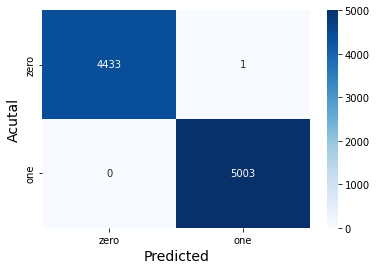

In [36]:
cm = plot_confusion_matrix(y_hat_trn, y_trn, class_names=class_names)

In [37]:
compute_scores(y_hat_trn, y_trn, class_names=class_names);

Scores for binary problem: postive label is one
	PPV ratio tp/(tp+fp): 5003/5004
	PPV (precision): 0.9998001598721024

	TPR ratio tp/(tp+fn): 5003/5003
	TPR (recall/sensitivity): 1.0

	TNR ratio tn/(tn+fp): 4433/4434
	TNR (specificity): 0.9997744700045106


## Evaluation

#### TODO 1 (8 points total)
Now, make predictions for the validation set and analyze the results. 

**Coding (4 points) - To receive <u>full points</u> you must have the following:**


1. Make predictions using your `X_vld` data.
1. Compute and display validation accuracy. Feel free to display `accuracy()` function.
1. Compute and display the validation confusion matrix. Feel free to use the  `plot_confusion_matrix()` function.
1. Compute and display the PPV, TPR, and TNR scores for all classes. Feel free to use the `compute_scores()` function.

**Written (4 points)** 

1. (1-2 sentences) Which classes are hindering the accuracy of the model the most? Provide references to the confusion matrix, PPV, TPR, and TNR scores to backup your answer.

In [38]:
y_hat_vld = model.predict(X_vld)
accuracy(y_hat=y_hat_vld, y=y_vld)

0.99625

Scores for binary problem: postive label is one
	PPV ratio tp/(tp+fp): 1272/1279
	PPV (precision): 0.9945269741985927

	TPR ratio tp/(tp+fn): 1272/1274
	TPR (recall/sensitivity): 0.9984301412872841

	TNR ratio tn/(tn+fp): 1119/1126
	TNR (specificity): 0.9937833037300178


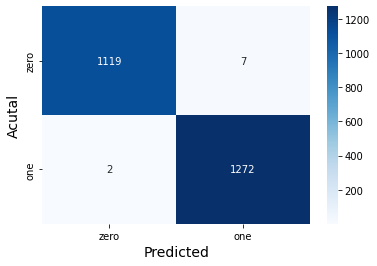

In [39]:
cm_two = plot_confusion_matrix(y_hat_vld, y_vld, class_names=class_names)
compute_scores(y_hat_vld, y_vld, class_names=class_names);

    TODO 1 -  Add written response below
    --------------------------------------
    
    1. -Looking at the PPV, the precision score is lower than the accuracy because we have a higher number of false 
       positives.
       -Lookings at the TNR, the specificity is lower than the accuracy meaning we have a high number of false positives. 

# Naive Bayes

In this second task, we will be using Naive Bayes to perform multi-class classification using ALL the digits 0 through 9.

In [40]:
from itcs4156.assignments.classification.NaiveBayes import NaiveBayes

## Data Cleaning and Transformation

Before you program the  Naive Bayes algorithm you need to set the data cleaning and transformations that need to be applied. Refer to labs to recall the minimal preprocessing steps required for the  Naive Bayes algorithm!

First let's look at the `data_prep()` method for the  Naive Bayes algorithm. The `data_prep()` method is accessed through the  `HyperParametersAndTransforms.NaiveBayes` sub-class.

Notice, the `data_prep()` method prepares the data for the Naive Bayes algorithm by applying any preprocessing stages that you will soon define in `self.feature_pipe` and `self.target_pipe`. 

In [41]:
print(inspect.getsource(hpt.NaiveBayes.data_prep))

        @staticmethod
        def data_prep(dataset, return_array=False):
            X_trn_df, y_trn_df, X_vld_df, y_vld_df = dataset.load()

            transforms = HyperParametersAndTransforms.NaiveBayes()
            X_trn_df, y_trn_df = transforms.fit_transform(X=X_trn_df, y=y_trn_df)
            X_vld_df, y_vld_df = transforms.transform(X=X_vld_df, y=y_vld_df)
            
            if return_array:
                print("Returning data as NumPy array...")
                return dataframe_to_array([X_trn_df, y_trn_df, X_vld_df, y_vld_df])
            
            return X_trn_df, y_trn_df, X_vld_df, y_vld_df



#### Autolab TODO 3

Within the `HyperParametersAndTransforms.NaiveBayes` class, set the `self.feature_pipe` and `self.target_pipe` to an instance of Sklearn's `Pipeline` in the `__init__()` method. Be sure to pass the necessary data cleaning/transformation classes. Any of the belows steps or `# TODO` comments marked as REQUIRED are required while any step marked as OPTIONAL are optional. If you don't think feature or target preprocessing are needed to achieve good performance then leave `self.feature_pipe = None` or `self.target_pipe = None`. 

**You have access to the following data cleaning/transformation classes within the `HyperParametersAndTransforms.py` file: `AddBias`, `Standardization`, `ImageNormalization`, `OneHotEncoding`. Choose the classes YOU think need to be applied and feel free to define your own classes within the `HyperParametersAndTransforms.py` file as well.**

1. (REQUIRED) Set the `self.feature_pipe` to an instance of Sklearn's `Pipeline`. Pass a list of tuples which define the data cleaning and transformation steps you wish to apply to the features.

1. (OPTIONAL) Optionally, you can choose to set the `self.target_pipe` to an instance of Sklearn's `Pipeline`. If you do NOT wish to set the `self.target_pipe` leave it equal to None `self.target_pipe = None`. If you do wish to set the `self.target_pipe` pass a list of tuples which define the data cleaning and transformation steps you wish to apply to the targets. 

Once you defined the `Pipeline` class instance you can test the `self.feature_pipe` and `self.target_pipe` preprocessing steps by running the below code which calls the `data_prep()` method which also returns the data you'll be using in this section. The below code also provides informative print statements you can use for debugging.

In [42]:
X_trn, y_trn, X_vld, y_vld = hpt.NaiveBayes.data_prep(dataset, 
                                                      return_array=True)

print(f"Shape of training data X_trn: {X_trn.shape}")
print(f"Shape of training labels y_trn: {y_trn.shape}")

print(f"Shape of validation data X_vld: {X_vld.shape}")
print(f"Shape of validation labels y_vld: {y_vld.shape}")

class_labels, trn_class_counts = np.unique(y_trn, return_counts=True)
_, vld_class_counts = np.unique(y_vld, return_counts=True)
print(f"\nUnique class labels:\n\t{class_labels}")
print(f"Training labels unique class label counts:\n\t{trn_class_counts}")
print(f"Validation labels unique class label counts:\n\t{vld_class_counts}")

print(f"\nTraining data value range:\n\tmin:{np.min(X_trn)} max:{np.max(X_trn)}")
print(f"Validation data value range:\n\tmin:{np.min(X_vld)} max:{np.max(X_vld)}")

Loading dataset with Pandas...
Done!
Returning data as NumPy array...
Shape of training data X_trn: (44800, 784)
Shape of training labels y_trn: (44800, 1)
Shape of validation data X_vld: (11200, 784)
Shape of validation labels y_vld: (11200, 1)

Unique class labels:
	[0 1 2 3 4 5 6 7 8 9]
Training labels unique class label counts:
	[4434 5003 4504 4564 4425 4001 4384 4641 4378 4466]
Validation labels unique class label counts:
	[1126 1274 1106 1144 1104 1039 1096 1149 1090 1072]

Training data value range:
	min:-1.2813868978111405 max:211.65756621622268
Validation data value range:
	min:-1.2813868978111405 max:216000000.0


## Training

#### Autolab TODO 4
Fill in the code for the `train()`, `predict()`, and other helper methods for `NaiveBayes` class in the `itcs4156/assignments/classification/NaiveBayes.py` file.

1. Complete the `train()` method by computing the priors and Gaussian parameters. To do so, first finish and then call the `compute_parameters()` and `compute_priors()` methods.
    1. Complete the `compute_parameters()` method by computing the means and stds for the Gaussian distribution which will then be used to comput the likelihoods. Store the computed means and stds into `self.means` and `self.stds`.
    1. Complete the `compute_priors()` method by computing the priors and log priors which will be used when making predictions using MAP. Store the computed priors and log priors into `self.priors` and `self.log_priors`.
1. Complete the `predict()` method by computing the log likelihoods and log priors.To do so, first finishing and then call the `compute_log_likelihoods()` method. You'll also need to access the class variables `self.log_priors`  and `self.class_labels` you set when running the `train()`, `compute_parameters()` and `compute_priors()` methods. Store the predicted labels into `y_hat`.
    1. Complete the `compute_log_likelihoods()` method  by computing the log likelihoods of the passed data `X`. Use the `self.means` and `self.stds` class variables you set in the `compute_parameters()` method along with the `log_gaussian_distribution()` method which is defined for you. The `log_gaussian_distribution()`  will apply the log to your feature likelihoods for you so you don't need to!

The below code prints the hyper-parameters you set the `HyperParametersAndTransforms.NaiveBayes`class.

In [43]:
nb_kwargs = hpt.get_params('NaiveBayes')
nb_kwargs

{'smoothing': 0.1}

Run the below code to train your algorithm implementation uses the hyper-parameters specified by `HyperParametersAndTransforms.NaiveBayes` sub-class.

**WARNING: This can take a few minutes to run depending on your implementation and speed of your computer.**


In [44]:
model = NaiveBayes(**nb_kwargs)

model.train(X_trn, y_trn)

Run the below code to check the performance of your algorithm implementation using accuracy, PPV, TPR, TNR, and a confusion matrix.

In [45]:
y_hat_trn =model.predict(X_trn)
accuracy(y_hat=y_hat_trn, y=y_trn)

0.6268303571428572

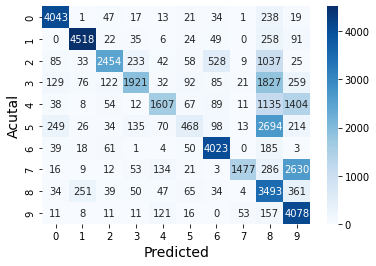

In [46]:
cm = plot_confusion_matrix(y_hat_trn, y_trn)

In [47]:
compute_scores(y_hat_trn, y_trn);

Scores for class 0
	PPV ratio tp/(tp+fp): 4043/4644
	PPV (precision): 0.8705857019810508

	TPR ratio tp/(tp+fn): 4043/4434
	TPR (recall/sensitivity): 0.9118177717636445

	TNR ratio tn/(tn+fp): 39765/40366
	TNR (specificity): 0.98511123222514
Scores for class 1
	PPV ratio tp/(tp+fp): 4518/4948
	PPV (precision): 0.9130962004850445

	TPR ratio tp/(tp+fn): 4518/5003
	TPR (recall/sensitivity): 0.9030581651009394

	TNR ratio tn/(tn+fp): 39367/39797
	TNR (specificity): 0.9891951654647335
Scores for class 2
	PPV ratio tp/(tp+fp): 2454/2856
	PPV (precision): 0.8592436974789915

	TPR ratio tp/(tp+fn): 2454/4504
	TPR (recall/sensitivity): 0.5448490230905861

	TNR ratio tn/(tn+fp): 39894/40296
	TNR (specificity): 0.9900238237045861
Scores for class 3
	PPV ratio tp/(tp+fp): 1921/2468
	PPV (precision): 0.7783630470016207

	TPR ratio tp/(tp+fn): 1921/4564
	TPR (recall/sensitivity): 0.4209027169149869

	TNR ratio tn/(tn+fp): 39689/40236
	TNR (specificity): 0.9864052092653345
Scores for class 4
	PPV ra

## Evaluation

#### TODO 2 (6 points total)
Now, make predictions for the validation set and analyze the results. 

**Coding (4 points) - To receive <u>full points</u> you must have the following:**


1. Make predictions using your `X_vld` data.
1. Compute and display validation accuracy. Feel free to display `accuracy()` function.
1. Compute and display the validation confusion matrix. Feel free to use the  `plot_confusion_matrix()` function.
1. Compute and display the PPV, TPR, and TNR scores for all classes. Feel free to use the `compute_scores()` function.

**Written (2 points)** 

2. (1-2 sentences) Which classes are hindering the accuracy of the model the most? Provide references to the confusion matrix, PPV, TPR, and TNR scores to backup your answer.

In [48]:
y_hat_vld = model.predict(X_vld)
accuracy(y_hat=y_hat_vld, y=y_vld)

0.6241071428571429

Scores for class 0
	PPV ratio tp/(tp+fp): 1025/1208
	PPV (precision): 0.8485099337748344

	TPR ratio tp/(tp+fn): 1025/1126
	TPR (recall/sensitivity): 0.9103019538188277

	TNR ratio tn/(tn+fp): 9891/10074
	TNR (specificity): 0.9818344252531268
Scores for class 1
	PPV ratio tp/(tp+fp): 1177/1321
	PPV (precision): 0.8909916729750189

	TPR ratio tp/(tp+fn): 1177/1274
	TPR (recall/sensitivity): 0.923861852433281

	TNR ratio tn/(tn+fp): 9782/9926
	TNR (specificity): 0.9854926455772718
Scores for class 2
	PPV ratio tp/(tp+fp): 564/647
	PPV (precision): 0.8717156105100463

	TPR ratio tp/(tp+fn): 564/1106
	TPR (recall/sensitivity): 0.5099457504520796

	TNR ratio tn/(tn+fp): 10011/10094
	TNR (specificity): 0.9917772934416486
Scores for class 3
	PPV ratio tp/(tp+fp): 499/613
	PPV (precision): 0.8140293637846656

	TPR ratio tp/(tp+fn): 499/1144
	TPR (recall/sensitivity): 0.4361888111888112

	TNR ratio tn/(tn+fp): 9942/10056
	TNR (specificity): 0.9886634844868735
Scores for class 4
	PPV ratio tp/(t

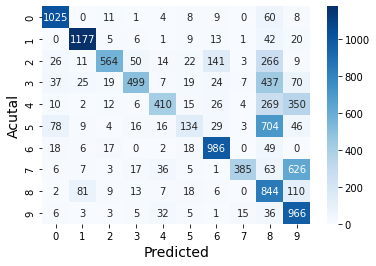

In [49]:
cm = plot_confusion_matrix(y_hat_vld, y_vld)
compute_scores(y_hat_vld, y_vld);

    TODO 2 -  Add written response below
    --------------------------------------
    
    1. The TPR for a majority of the classes falls below the accuracy of .6231.  Class 8 and Class 9 PPV also falls to almost half as much as the accuracy.  

# Multi-Class Classification with Logistic Regression

In this third task, we will be using logistic regression for performing multi-class classification using ALL the digits 0 through 9 once again.

In [50]:
from itcs4156.assignments.classification.LogisticRegression import LogisticRegression

## Data Cleaning and Transformation

Before you program the logistic regression algorithm you need to set the data cleaning and transformations that need to be applied. Refer to labs to recall the minimal preprocessing steps required for the  logistic regression algorithm!

First let's look at the `data_prep()` method for the  logistic regression algorithm. The `data_prep()` method is accessed through the  `HyperParametersAndTransforms.LogisticRegression` sub-class.

Notice, the `data_prep()` method prepares the data for the logistic regression algorithm by applying any preprocessing stages that you will soon define in `self.feature_pipe` and `self.target_pipe`. 

In [51]:
print(inspect.getsource(hpt.LogisticRegression.data_prep))

        @staticmethod
        def data_prep(dataset, return_array=False):
            X_trn_df, y_trn_df, X_vld_df, y_vld_df = dataset.load()

            transforms = HyperParametersAndTransforms.LogisticRegression()
            X_trn_df, y_trn_df = transforms.fit_transform(X=X_trn_df, y=y_trn_df)
            X_vld_df, y_vld_df = transforms.transform(X=X_vld_df, y=y_vld_df)

            if return_array:
                print("Returning data as NumPy array...")
                return dataframe_to_array([X_trn_df, y_trn_df, X_vld_df, y_vld_df])
            
            return X_trn_df, y_trn_df, X_vld_df, y_vld_df



#### Autolab TODO 5

Within the `HyperParametersAndTransforms.LogisticRegression` class, set the `self.feature_pipe` and `self.target_pipe` to an instance of Sklearn's `Pipeline` in the `__init__()` method. Be sure to pass the necessary data cleaning/transformation classes. Any of the belows steps or `# TODO` comments marked as REQUIRED are required while any step marked as OPTIONAL are optional. If you don't think feature or target preprocessing are needed to achieve good performance then leave `self.feature_pipe = None` or `self.target_pipe = None`. 

**You have access to the following data cleaning/transformation classes within the `HyperParametersAndTransforms.py` file: `AddBias`, `Standardization`, `ImageNormalization`, `OneHotEncoding`. Choose the classes YOU think need to be applied and feel free to define your own classes within the `HyperParametersAndTransforms.py` file as well.**

1. (REQUIRED) Set the `self.feature_pipe` to an instance of Sklearn's `Pipeline`. Pass a list of tuples which define the data cleaning and transformation steps you wish to apply to the features.

1. (REQUIRED) Set the `self.target_pipe` to an instance of Sklearn's `Pipeline`. Pass a list of tuples which define the data cleaning and transformation steps you wish to apply to the features.

Once you defined the `Pipeline` class instance you can test the `self.feature_pipe` and `self.target_pipe` preprocessing steps by running the below code which calls the `data_prep()` method which also returns the data you'll be using in this section. The below code also provides informative print statements you can use for debugging.

In [70]:
data = hpt.LogisticRegression.data_prep(dataset, return_array=True)
X_trn, y_trn, X_vld, y_vld =  data

print(f"Shape of training data X_trn: {X_trn.shape}")
print(f"Shape of training labels y_trn: {y_trn.shape}")

print(f"Shape of validation data X_vld: {X_vld.shape}")
print(f"Shape of validation labels y_vld: {y_vld.shape}")

class_labels, trn_class_counts = np.unique(np.argmax(y_trn, axis=1), return_counts=True)
_, vld_class_counts = np.unique(np.argmax(y_vld, axis=1), return_counts=True)
print(f"\nUnique class labels:\n\t{class_labels}")
print(f"Training labels unique class label counts:\n\t{trn_class_counts}")
print(f"Validation labels unique class label counts:\n\t{vld_class_counts}")

print(f"\nTraining data value range:\n\tmin:{np.min(X_trn)} max:{np.max(X_trn)}")
print(f"Validation data value range:\n\tmin:{np.min(X_vld)} max:{np.max(X_vld)}")

Loading dataset with Pandas...
Done!


C:\Users\himea\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Returning data as NumPy array...
Shape of training data X_trn: (44800, 785)
Shape of training labels y_trn: (44800, 10)
Shape of validation data X_vld: (11200, 785)
Shape of validation labels y_vld: (11200, 10)

Unique class labels:
	[0 1 2 3 4 5 6 7 8 9]
Training labels unique class label counts:
	[4434 5003 4504 4564 4425 4001 4384 4641 4378 4466]
Validation labels unique class label counts:
	[1126 1274 1106 1144 1104 1039 1096 1149 1090 1072]

Training data value range:
	min:-1.2813868978111405 max:211.65756621622268
Validation data value range:
	min:-1.2813868978111405 max:216000000.0


## Training

#### Autolab TODO 6
Fill in the code for the `train()` and `predict()` and other helper methods for `LogisticRegression` class in the `itcs4156/assignments/classification/LogisticRegression.py` file.

1. Complete the `train()` method by using either batch or mini-batch gradient descent to learn the best weights to classify the data. You'll need to finish and also call the `softmax()` method to complete this method. Also, update and store the learned weights into `self.w`. 
    1. Complete the `softmax` method by adding code to return the softmax. Don't forget to subtract the max from `z` to maintain  numerical stability!

1. Complete the `predict()` method by adding code to make a prediction given the learned weights `self.w`. Store the predicted labels into `y_hat`.

The below code prints the hyper-parameters you set the `HyperParametersAndTransforms.LogisticRegression`class.

In [71]:
logistic_kwargs = hpt.get_params('LogisticRegression')
logistic_kwargs

{'alpha': 0.1, 'epochs': 100, 'batch_size': None}

Run the below code to train your algorithm implementation uses the hyper-parameters specified by `HyperParametersAndTransforms.LogisticRegression` sub-class.

**WARNING: This can take a few minutes to run depending on your implementation and speed of your computer.**

In [76]:
model = LogisticRegression(**logistic_kwargs)

model.train(X_trn, y_trn)

Run the below code to check the performance of your algorithm implementation using accuracy, PPV, TPR, TNR, and a confusion matrix.

In [77]:
y_hat_trn = model.predict(X_trn)
accuracy(y_hat=y_hat_trn, y=y_trn)

0.7992633928571429

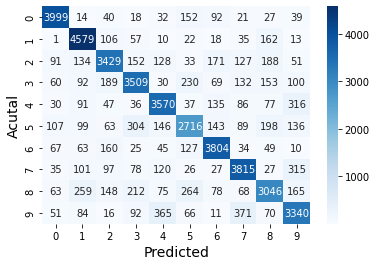

In [78]:
cm = plot_confusion_matrix(y_hat_trn, y_trn)

In [79]:
compute_scores(y_hat_trn, y_trn);

Scores for class 0
	PPV ratio tp/(tp+fp): 3999/4504
	PPV (precision): 0.8878774422735346

	TPR ratio tp/(tp+fn): 3999/4434
	TPR (recall/sensitivity): 0.9018944519621109

	TNR ratio tn/(tn+fp): 39861/40366
	TNR (specificity): 0.9874894713372641
Scores for class 1
	PPV ratio tp/(tp+fp): 4579/5516
	PPV (precision): 0.830130529369108

	TPR ratio tp/(tp+fn): 4579/5003
	TPR (recall/sensitivity): 0.9152508494903058

	TNR ratio tn/(tn+fp): 38860/39797
	TNR (specificity): 0.9764555117219891
Scores for class 2
	PPV ratio tp/(tp+fp): 3429/4295
	PPV (precision): 0.7983701979045401

	TPR ratio tp/(tp+fn): 3429/4504
	TPR (recall/sensitivity): 0.7613232682060391

	TNR ratio tn/(tn+fp): 39430/40296
	TNR (specificity): 0.9785090331546555
Scores for class 3
	PPV ratio tp/(tp+fp): 3509/4483
	PPV (precision): 0.7827347758197636

	TPR ratio tp/(tp+fn): 3509/4564
	TPR (recall/sensitivity): 0.7688431200701139

	TNR ratio tn/(tn+fp): 39262/40236
	TNR (specificity): 0.9757928223481459
Scores for class 4
	PPV r

## Evaluation

#### TODO 3  (6 points total)
Now, make predictions for the validation set and analyze the results. 

**Coding (4 points) - To receive <u>full points</u> you must have the following:**


1. Make predictions using your `X_vld` data.
1. Compute and display validation accuracy. Feel free to display `accuracy()` function.
1. Compute and display the validation confusion matrix. Feel free to use the  `plot_confusion_matrix()` function.
1. Compute and display the PPV, TPR, and TNR scores for all classes. Feel free to use the `compute_scores()` function.

**Written (2 points)** 

2. (1-2 sentences) Which classes are hindering the accuracy of the model the most? Provide references to the confusion matrix, PPV, TPR, and TNR scores to backup your answer.

In [80]:
y_hat_vld = model.predict(X_vld)
accuracy(y_hat=y_hat_vld, y=y_vld)

0.80125

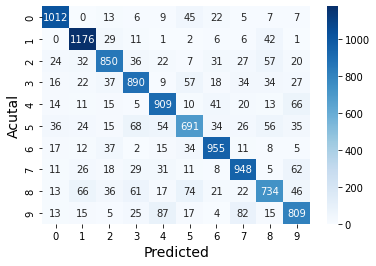

In [82]:
cm = plot_confusion_matrix(y_hat_vld, y_vld)

In [83]:
compute_scores(y_hat_vld, y_vld);

Scores for class 0
	PPV ratio tp/(tp+fp): 1012/1156
	PPV (precision): 0.8754325259515571

	TPR ratio tp/(tp+fn): 1012/1126
	TPR (recall/sensitivity): 0.8987566607460036

	TNR ratio tn/(tn+fp): 9930/10074
	TNR (specificity): 0.9857057772483622
Scores for class 1
	PPV ratio tp/(tp+fp): 1176/1384
	PPV (precision): 0.8497109826589595

	TPR ratio tp/(tp+fn): 1176/1274
	TPR (recall/sensitivity): 0.9230769230769231

	TNR ratio tn/(tn+fp): 9718/9926
	TNR (specificity): 0.9790449325005037
Scores for class 2
	PPV ratio tp/(tp+fp): 850/1055
	PPV (precision): 0.8056872037914692

	TPR ratio tp/(tp+fn): 850/1106
	TPR (recall/sensitivity): 0.7685352622061483

	TNR ratio tn/(tn+fp): 9889/10094
	TNR (specificity): 0.979690905488409
Scores for class 3
	PPV ratio tp/(tp+fp): 890/1133
	PPV (precision): 0.7855251544571933

	TPR ratio tp/(tp+fn): 890/1144
	TPR (recall/sensitivity): 0.777972027972028

	TNR ratio tn/(tn+fp): 9813/10056
	TNR (specificity): 0.975835322195704
Scores for class 4
	PPV ratio tp/(tp

    TODO 3 -  Add written response below
    --------------------------------------
    
    1. Class 5 is PPV and TPR are far under the accuracy.  Class 8 and Class 9 also fall below the accuracy.  

# Putting it all together!

Once you have finished all the above four **TODOs** and you are satisfied with the results you are getting, it is time evaluate all your code together and make it ready for submission to Autolab.

Before running the `run_eval()` function below, make sure you have filled out all the required hyper-parameters and data cleaning/transformations in the `HyperParametersAndTransforms` class contained within `itcs4156/assignments/classification/train.py` script class. You should have already done this!

**MAKE SURE THEY ARE SET BEFORE RUNNING `run_eval()` LOCALLY AND BEFORE SUBMITTING TO AUTOLAB!** 

## Final Testing

Next, we will evaluate all your models on the validation split. Each test will return a score based on your validation accuracy **This local test only indicates what score you might receive on Autolab and that your implementations seem to be working .** Recall, full points will only be given for each test you pass when using the **TEST** set on Autolab. 


### Errors
If a given test fails when running `run_eval()` due to a thrown error the error will be printed for the corresponding algorithm/class. You can view any errors both locally, when using the below test, and on Autolab by clicking on the submission and viewing the log. 

### Autolab Time Limit
For this assignment when you submit to Autolab you will only have **10 minutes for <u>ALL</u> your algorithms to be trained and tested**. If you exceed this time then Autolab will kill your job and you will receive a 0. You can see the elapsed total time (at the bottom of the `run_eval()` output right before total points earned) and the time it took for each algorithm (given right before the points earned) to run locally and in Autolab.


### Leaderboard ranking

Recall when you submit to Autolab the top 10 students will receive extra credit points. The leader board ranking is based on total pointed earned and the total execution time.

In [84]:
from itcs4156.assignments.classification.evaluate import run_eval
run_eval()

Skipping download. File already exists: c:\users\himea\desktop\itcs4156\mini-projects\itcs4156\datasets\data\MNIST\trn.zip

Unzipping: c:\users\himea\desktop\itcs4156\mini-projects\itcs4156\datasets\data\MNIST\trn.zip

Skipping download. File already exists: c:\users\himea\desktop\itcs4156\mini-projects\itcs4156\datasets\data\MNIST\vld.zip

Unzipping: c:\users\himea\desktop\itcs4156\mini-projects\itcs4156\datasets\data\MNIST\vld.zip

Building model Perceptron
Loading dataset with Pandas...
Done!
Returning data as NumPy array...
	Training Perceptron...
		Using hyperparameters: 
			alpha = 0.5
			epochs = 5
Epochs trained: 5
		Train Accuracy: 1.0
	Evaluating Perceptron...
		Validation Accuracy: 0.996
Elapsed time: 5.8840 seconds

Points Earned: 25.0
Building model NaiveBayes
Loading dataset with Pandas...
Done!
Returning data as NumPy array...
	Training NaiveBayes...
		Using hyperparameters: 
			smoothing = 0.1
		Train Accuracy: 0.627
	Evaluating NaiveBayes...
		Validation Accuracy: 0.62

C:\Users\himea\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Returning data as NumPy array...
	Training LogisticRegression...
		Using hyperparameters: 
			alpha = 0.1
			epochs = 100
			batch_size = None
		Train Accuracy: 0.799
	Evaluating LogisticRegression...
		Validation Accuracy: 0.801
Elapsed time: 37.2974 seconds

Points Earned: 30.0
Elapsed time: 87.0164 seconds
Totals Points Earned: 78/80


(78, 87.01644179999994, [0.99625, 0.6241071428571429, 0.80125])